- 집계연산(Group Aggregation)이 이루어지는 과정은?

실제로 그룹 바이 한 이후에 인자로 값을 주어지면 전체데이터가 쪼개진다. split이 실제로 이뤄진다.

- rest_index()가 하는 일은?
남녀별로 합계를 내게 되면 결과 나오면서 인덱스로 값이 변환된다. 그런 결과가 보기 좋은 것은 아닌데 인덱스를 컬럼으로 바꾸는 코드로써 보기 좋게 변환된다.

- 컬럼마다 다른 집계함수를 적용하고 결과에 명명까지 하려면?
컬럼별 지정할려면 딕셔너리 적용하고 각 키에다가 적용시키고
리스트 각각 원소에 튜플로 집어넣는다. 집계함수

- pivot_table의 역할과 주요 파라미터는 무엇인가?
groupby는 하나의 특정한 column에 값을 가지고 집계 내는 방식(1차원)
pivot_table은 groupby와 달리 2차원 관점에서 값을 집계 내는 방식 (...별, ....별이라고 적혀 있으면 2차원 이상이니 pivot_table로 쓸 수 있다.)
groupby는 기준이 column 하나에 대해서 그 값을 가지고 집계를 내는 방식.

- 두 데이터 프레임을 병합(merge)하는 유형은?
merge를 할 때 pd.merge를 하고 파라미터 두개를 넣는다. 병합하고 싶은 데이터프레임 두개. 첫 번째 df는 left, 두 번째 df는 right, 4가지 유형
왜 4가지 유형이 필요할까? 무조건 키값 관점이 필요하다. 같은 값을 가지기 위해서 필요한 것은? 두 데이터의 같이 나타나는 동일한 형태의 column이 필요하다. column에서 같은 값이 나타나면 서로 연결할 수 있다. merge의 역할은 두 개의 데이터를 겹치는 데 같으냐, 틀리냐를 기준으로 하는 게 merge다.

- merge와 concat의 차이는?
key 없이 붙일려면 위아래 붙이거나 옆으로 붙이거나 두 가지 방법이 있다. concat이 두 개의 데이터를 그냥 붙이는 것. 

- 아래 코드는 오류를 발생시킨다. 왜 일까?
if df['pop'] > 500: df['pop2' = df['pop'] + 2
else: df['pop2'] = df['pop'] + 1.5
지금 df['pop']이 Series이다. Series는 사칙연산, 대수비교는 원소별로 연산된다. 값이 여러개이기 때문이다. 문제는 if는 True or False만 나오는데 각 원소별로 True , False가 다르게 나올 수 있어서 오류가 나온다. 이걸 해결할려면 if는 값이 여러개가 아니라 Series 연산 하는 것이 아니라 값 하나만 연산하도록 처리해야 된다.

- 데이터 프레임의 index를 1부터 시작하려면 어떻게 해야 하나?
df.index += 1

- 컬럼을 없애는 방법을 아는 대로 얘기하라.
del 뒤에 column명 입력, drop만 하면 기존에 데이터에 적용 안되서 inplace 써서 새로 지정해 준다. 
권장하는 방법은 drop이다.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<font color = "#CC3D3D"><p>
# Topics
* [Apply](#Apply)
* [Manipulating Dates and Times](#Manipulating-Dates-and-Times)
* [Handling Missing Data](#Handling-Missing-Data)

## Apply

<font color = 'blue'>
    Apply 정의 :
    Apply a function to each value in a Series
    


In [9]:
Series(range(1,5)).apply(np.log)#.plot.box()

0    0.000000
1    0.693147
2    1.098612
3    1.386294
dtype: float64

파이썬 시각화는 matplotlib라는 기본 패키지 : 너무 low 레벨 패키지
    두 번째 패키지 : pandas에서 기본 패키지 제공 : plot
            세 번째 패키지 :??? 

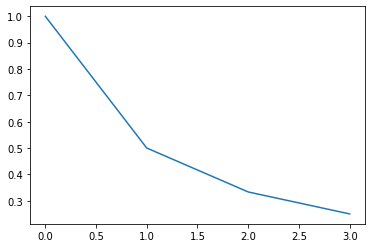

In [11]:
# lamda 함수의 파라미터인 x에는 Series의 특정 원소값이 할당 
Series(range(1,5)).apply(lambda x: 1/x).plot() # lambda의 x는 원소 하나를 의미한다.

In [12]:
# 파라미터를 추가할 때 apply()의 args 파라미터에 튜플로 값 지정  
Series(range(1,5)).apply(lambda x,y: x+y, args=(3,))

0    4
1    5
2    6
3    7
dtype: int64

In [13]:
df = pd.DataFrame({
        'id': [1,1,1,1,2,2,2],
        'site': ['a','b','c','a','a','b','b'],
        'pageview': np.arange(1,8),
        'dwelltime': np.arange(7.0, 0, -1),
    }, columns=['id','site','pageview','dwelltime'])
df

,id,site,pageview,dwelltime
0,1,a,1,7.0
1,1,b,2,6.0
2,1,c,3,5.0
3,1,a,4,4.0
4,2,a,5,3.0
5,2,b,6,2.0
6,2,b,7,1.0


In [14]:
def normalize(x, min, max): 
    return (x-min)/(max-min)

min = df['pageview'].min(); max = df['pageview'].max(); 
min, max

(1, 7)

In [15]:
df['pageview'].apply(normalize, args=(min, max))

# normalize 함수는 파라미터가 두 개 더 있어야 한다.

0    0.000000
1    0.166667
2    0.333333
3    0.500000
4    0.666667
5    0.833333
6    1.000000
Name: pageview, dtype: float64

## Manipulating Dates and Times

In [16]:
# pd.date_range 함수를 쓰면 날짜/시간을 일일히 입력할 필요없이 지정한 범위 내의 날짜를 생성
# https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/ 참조
t = Series(pd.date_range('2020-05-20', periods=7))
t

# 양은 datetime , 절대 시간은 timedelta
# ex: 700시간이 몇 초인지 알 수 있는 건 timedelta
# date_range는 5월 20일간 7일 생산.

0   2020-05-20
1   2020-05-21
2   2020-05-22
3   2020-05-23
4   2020-05-24
5   2020-05-25
6   2020-05-26
dtype: datetime64[ns]

In [17]:
t = pd.to_datetime(Series(['2020-05-20','2020-05-21','2020-05-22','2020-05-23','2020-05-24','2020-05-25','2020-05-26']))
t

0   2020-05-20
1   2020-05-21
2   2020-05-22
3   2020-05-23
4   2020-05-24
5   2020-05-25
6   2020-05-26
dtype: datetime64[ns]

In [29]:
Series(['2020-05-20','2020-05-21','2020-05-22']).astype('datetime64').dt.month

0    5
1    5
2    5
dtype: int64

In [28]:
# Series의 한 원소에 대해 날짜 정보를 얻으려면
t[0].year , t[0].month, t[0].day

(2020, 5, 20)

In [19]:
# Series의 모든 원소에 대해 한꺼번에 날짜 정보를 얻으려면
print(t.dt.year)
print(t.dt.month)
print(t.dt.day)

0    2020
1    2020
2    2020
3    2020
4    2020
5    2020
6    2020
dtype: int64
0    5
1    5
2    5
3    5
4    5
5    5
6    5
dtype: int64
0    20
1    21
2    22
3    23
4    24
5    25
6    26
dtype: int64


In [20]:
list(zip(t.dt.year, t.dt.month, t.dt.day))

[(2020, 5, 20),
 (2020, 5, 21),
 (2020, 5, 22),
 (2020, 5, 23),
 (2020, 5, 24),
 (2020, 5, 25),
 (2020, 5, 26)]

<font color = 'blue'>Weekday

In [30]:
t[0].weekday # 하나 뽑을 때
t.dt.weekday

<function Timestamp.weekday>

In [22]:
t.apply(lambda x: x.weekday())

0    2
1    3
2    4
3    5
4    6
5    0
6    1
dtype: int64

In [23]:
t.dt.day_name()

0    Wednesday
1     Thursday
2       Friday
3     Saturday
4       Sunday
5       Monday
6      Tuesday
dtype: object

str Accessor(참조 : https://blog.naver.com/wideeyed/221603778414)

In [24]:
# pandas에서 문자열 처리는 .str 객체를 사용
t.dt.day_name().str.upper() # 원소별로 각각 str 하는 거다.

0    WEDNESDAY
1     THURSDAY
2       FRIDAY
3     SATURDAY
4       SUNDAY
5       MONDAY
6      TUESDAY
dtype: object

In [34]:
t.dt.day_name().str.upper().str[:3]

0    WED
1    THU
2    FRI
3    SAT
4    SUN
5    MON
6    TUE
dtype: object

In [ ]:
t.dt.day_name().str.upper().str[:3].str.contains('SAT')

In [31]:
t.apply(lambda x: ('월','화','수','목','금','토','일')[x.weekday()] + '요일')

0    수요일
1    목요일
2    금요일
3    토요일
4    일요일
5    월요일
6    화요일
dtype: object

In [39]:
df['date'] = Series(['2020-05-20','2020-05-21','2020-05-22','2020-05-23','2020-05-24','2020-05-25','2020-05-26'])
df

,id,site,pageview,dwelltime,date
0,1,a,1,7.0,2020-05-20
1,1,b,2,6.0,2020-05-21
2,1,c,3,5.0,2020-05-22
3,1,a,4,4.0,2020-05-23
4,2,a,5,3.0,2020-05-24
5,2,b,6,2.0,2020-05-25
6,2,b,7,1.0,2020-05-26


In [36]:
df

,id,site,pageview,dwelltime
0,1,a,1,7.0
1,1,b,2,6.0
2,1,c,3,5.0
3,1,a,4,4.0
4,2,a,5,3.0
5,2,b,6,2.0
6,2,b,7,1.0


In [40]:
# 날짜가 문자열로 되어 있는 컬럼에서 요일을 얻으려면
df['dayofweek'] = df.date.astype('datetime64').dt.day_name().str[:3]
df

,id,site,pageview,dwelltime,date,dayofweek
0,1,a,1,7.0,2020-05-20,Wed
1,1,b,2,6.0,2020-05-21,Thu
2,1,c,3,5.0,2020-05-22,Fri
3,1,a,4,4.0,2020-05-23,Sat
4,2,a,5,3.0,2020-05-24,Sun
5,2,b,6,2.0,2020-05-25,Mon
6,2,b,7,1.0,2020-05-26,Tue


<font color = 'blue'>Elapsed time
    
    - 날짜나 시간의 간격을 구할 때는 두 개의 datetime64 객체의 차이를 구함 => 결과는 timedelta64 객체로 반환

In [45]:
# 2000-01-01부터의 경과일 계산

edays = (t - pd.to_datetime('2000-01-01'))
edays # + 1 # 인트형으로 숫자 추가 시 오류가 발생

0   7445 days
1   7446 days
2   7447 days
3   7448 days
4   7449 days
5   7450 days
6   7451 days
dtype: timedelta64[ns]

In [47]:
edays.astype('timedelta64[D]').astype('int') # + 1 을 썻을 때 error가 발생하지 않는다.

0    7446
1    7447
2    7448
3    7449
4    7450
5    7451
6    7452
dtype: int32

In [48]:
df['elapsed'] = (df.date.astype('datetime64') - pd.to_datetime('2000-01-01')).astype('timedelta64[D]').astype('int')
df

,id,site,pageview,dwelltime,date,dayofweek,elapsed
0,1,a,1,7.0,2020-05-20,Wed,7445
1,1,b,2,6.0,2020-05-21,Thu,7446
2,1,c,3,5.0,2020-05-22,Fri,7447
3,1,a,4,4.0,2020-05-23,Sat,7448
4,2,a,5,3.0,2020-05-24,Sun,7449
5,2,b,6,2.0,2020-05-25,Mon,7450
6,2,b,7,1.0,2020-05-26,Tue,7451


[추가] 날짜와 시간을 더하거나 뺄 때는 pd.DateOffset 함수를 사용

In [49]:
# 특정 기간 후
df['date_3m'] = df.date.astype('datetime64') + pd.DateOffset(months=3)
df['date_3d'] = df.date.astype('datetime64') + pd.DateOffset(days=3)
df['date_3y'] = df.date.astype('datetime64') + pd.DateOffset(years=3)
# 특정 기간 전
df['date_3m_ago'] = df.date.astype('datetime64') + pd.DateOffset(months=-3)

df

,id,site,pageview,dwelltime,date,dayofweek,elapsed,date_3m,date_3d,date_3y,date_3m_ago
0,1,a,1,7.0,2020-05-20,Wed,7445,2020-08-20,2020-05-23,2023-05-20,2020-02-20
1,1,b,2,6.0,2020-05-21,Thu,7446,2020-08-21,2020-05-24,2023-05-21,2020-02-21
2,1,c,3,5.0,2020-05-22,Fri,7447,2020-08-22,2020-05-25,2023-05-22,2020-02-22
3,1,a,4,4.0,2020-05-23,Sat,7448,2020-08-23,2020-05-26,2023-05-23,2020-02-23
4,2,a,5,3.0,2020-05-24,Sun,7449,2020-08-24,2020-05-27,2023-05-24,2020-02-24
5,2,b,6,2.0,2020-05-25,Mon,7450,2020-08-25,2020-05-28,2023-05-25,2020-02-25
6,2,b,7,1.0,2020-05-26,Tue,7451,2020-08-26,2020-05-29,2023-05-26,2020-02-26


## Handling Missing Data

In [50]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'], 'data2': range(3)})
df5 = pd.merge(df3, df4, left_on='lkey', right_on='rkey', how='outer')
df5

,lkey,data1,rkey,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
6,c,3.0,NaN,NaN
7,NaN,NaN,d,2.0


<font color = 'blue'>Find missing values

In [51]:
pd.isnull(df5)  # df5.isnull()

,lkey,data1,rkey,data2
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,True,True
7,True,True,False,False


In [52]:
pd.notnull(df5.data1)  # df5.data1.notnull()

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7    False
Name: data1, dtype: bool

<font color = 'blue'>Remove rows with missing values

In [53]:
df5.dropna(how='any')

,lkey,data1,rkey,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0


In [56]:
df5.dropna(how='all')

,lkey,data1,rkey,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
7,NaN,NaN,d,2.0


In [55]:
df5.iloc[6] = [np.nan, np.nan, np.nan, np.nan]
df5

,lkey,data1,rkey,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
6,NaN,NaN,NaN,NaN
7,NaN,NaN,d,2.0


In [57]:
df5.dropna(how='all').reset_index(drop=True)
# sorting 하면 인덱스가 다 뒤집히는데 그 때 reset_index를 활용하게 되면 인덱스가 다시 초기화된다.

,lkey,data1,rkey,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
6,NaN,NaN,d,2.0


merge 말고 concat할 때 옆으로 붙일 수 있다. index가 같은 순으로 붙는다. 나중에 reset_index를 통해서 항상 reset 하는 것이 중요하다.

<font color = 'blue'>Replace Missing Values

In [58]:
df5.fillna(-1) # 모든 NaN 값에 -1 값을 추가

,lkey,data1,rkey,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
6,-1,-1.0,-1,-1.0
7,-1,-1.0,d,2.0


In [59]:
df5.fillna({'data1': 1.5, 'data2': 0.5, 'lkey': 'Y', 'rkey': ''})

,lkey,data1,rkey,data2
0,b,0.0,b,1.0
1,b,1.0,b,1.0
2,b,6.0,b,1.0
3,a,2.0,a,0.0
4,a,4.0,a,0.0
5,a,5.0,a,0.0
6,Y,1.5,,0.5
7,Y,1.5,d,2.0


<font color = "#CC3D3D"><p>
# End